In [43]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, InputLayer
from tensorflow.keras.optimizers import Adam

In [45]:
def load_data(data_path, img_size=(150, 150), batch_size=32, val_split=0.2):

    datagen = ImageDataGenerator(
        rescale=1.0/255,        
        shear_range=0.2,        # Apply random shear for augmentation
        zoom_range=0.2,         # Apply random zoom
        horizontal_flip=True,   # Randomly flip images horizontally
        validation_split=val_split
    )

    train_generator = datagen.flow_from_directory(
        data_path,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical',
        subset='training'
    )

    val_generator = datagen.flow_from_directory(
        data_path,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical',
        subset='validation'
    )

    return train_generator, val_generator

In [47]:
def build_cnn_model(num_classes, img_shape=(150, 150, 3), dropout=0.5):

    model = Sequential()

    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=img_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(dropout))  # Dropout to reduce overfitting
    model.add(Dense(num_classes, activation='softmax'))  

    return model

In [49]:
# This function builds a simple Keras Sequential model for image classification
def build_sequential_model(num_classes, img_shape=(150, 150, 3)):
    # Initialize the model as a sequential stack of layers
    model = Sequential([
        InputLayer(input_shape=img_shape),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    return model


In [51]:
def train_and_evaluate(model, train_gen, val_gen, name, lr=0.001, epochs=15):
    
    model.compile(optimizer=Adam(learning_rate=lr),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(train_gen, validation_data=val_gen, epochs=epochs)

    print(f"\nEvaluating {name} model...")
    val_gen.reset()  # Ensure correct batch order
    predictions = model.predict(val_gen)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = val_gen.classes
    class_labels = list(val_gen.class_indices.keys())

    print(classification_report(true_classes, predicted_classes, target_names=class_labels))

    cm = confusion_matrix(true_classes, predicted_classes)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_labels, yticklabels=class_labels)
    plt.title(f'{name} - Confusion Matrix')
    plt.show()

    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title(f'{name} - Accuracy Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    return history

In [41]:
def load_test_data(test_path, img_size=(150, 150), batch_size=32):
    test_datagen = ImageDataGenerator(rescale=1.0/255)
    
    test_generator = test_datagen.flow_from_directory(
        test_path,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False 
    )
    
    return test_generator


In [39]:
def Show_confusion_matrix(model,test_gen):
    test_loss, test_accuracy = model.evaluate(test_gen)
    print(f"Test Loss: {test_loss:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    
    test_preds = model.predict(test_gen)
    test_pred_classes = np.argmax(test_preds, axis=1)
    test_true_classes = test_gen.classes
    labels = list(test_gen.class_indices.keys())
    
    print("Classification Report on Test Set:")
    print(classification_report(test_true_classes, test_pred_classes, target_names=labels))
    
    cm = confusion_matrix(test_true_classes, test_pred_classes)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title("Test Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

Found 29920 images belonging to 4 classes.
Found 7480 images belonging to 4 classes.
Epoch 1/5
935/935 ━━━━━━━━━━━━━━━━━━━━ 667s 712ms/step - accuracy: 0.3186 - loss: 1.3451 - val_accuracy: 0.4676 - val_loss: 1.1729
Epoch 2/5
935/935 ━━━━━━━━━━━━━━━━━━━━ 475s 508ms/step - accuracy: 0.4047 - loss: 1.2012 - val_accuracy: 0.5068 - val_loss: 1.0734
Epoch 3/5
935/935 ━━━━━━━━━━━━━━━━━━━━ 409s 437ms/step - accuracy: 0.4326 - loss: 1.1368 - val_accuracy: 0.5437 - val_loss: 1.0334
Epoch 4/5
935/935 ━━━━━━━━━━━━━━━━━━━━ 375s 401ms/step - accuracy: 0.4533 - loss: 1.0964 - val_accuracy: 0.5674 - val_loss: 0.9642
Epoch 5/5
935/935 ━━━━━━━━━━━━━━━━━━━━ 373s 398ms/step - accuracy: 0.4601 - loss: 1.0659 - val_accuracy: 0.5869 - val_loss: 0.9286

Evaluating CNN model...
234/234 ━━━━━━━━━━━━━━━━━━━━ 48s 203ms/step
                  precision    recall  f1-score   support

    MildDemented       0.22      0.14      0.17      1700
ModerateDemented       0.23      0.27      0.25      1700
     NonDemented

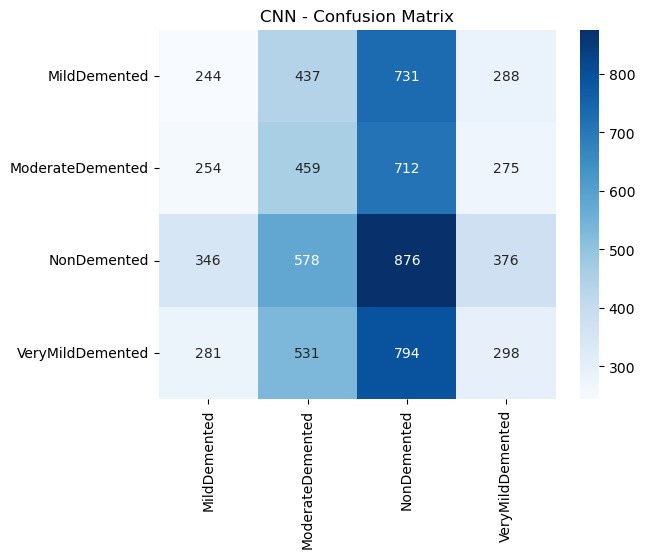

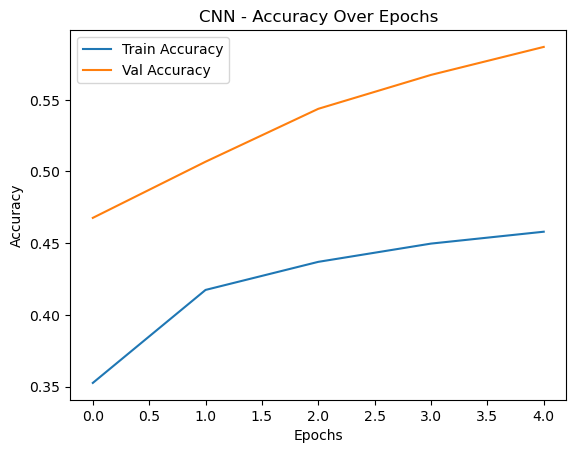

C:\Users\gm010\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/5
935/935 ━━━━━━━━━━━━━━━━━━━━ 288s 307ms/step - accuracy: 0.3381 - loss: 1.3927 - val_accuracy: 0.4238 - val_loss: 1.2171
Epoch 2/5
935/935 ━━━━━━━━━━━━━━━━━━━━ 319s 341ms/step - accuracy: 0.4451 - loss: 1.2104 - val_accuracy: 0.4906 - val_loss: 1.1562
Epoch 3/5
935/935 ━━━━━━━━━━━━━━━━━━━━ 290s 310ms/step - accuracy: 0.4879 - loss: 1.1503 - val_accuracy: 0.4884 - val_loss: 1.1418
Epoch 4/5
935/935 ━━━━━━━━━━━━━━━━━━━━ 258s 276ms/step - accuracy: 0.5047 - loss: 1.1071 - val_accuracy: 0.5045 - val_loss: 1.0936
Epoch 5/5
935/935 ━━━━━━━━━━━━━━━━━━━━ 276s 295ms/step - accuracy: 0.5103 - loss: 1.0950 - val_accuracy: 0.5214 - val_loss: 1.0644

Evaluating Keras Sequential model...
234/234 ━━━━━━━━━━━━━━━━━━━━ 48s 207ms/step
                  precision    recall  f1-score   support

    MildDemented       0.22      0.17      0.19      1700
ModerateDemented       0.22      0.27      0.24      1700
     NonDemented       0.29      0.40      0.34      2176
VeryMildDemented       0.25   

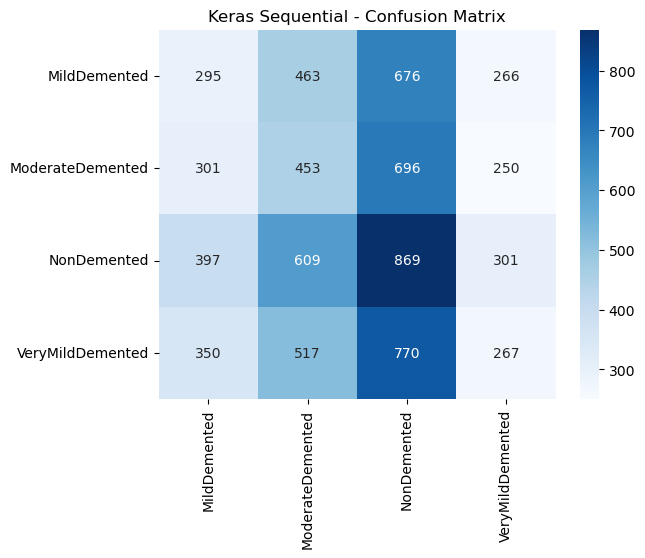

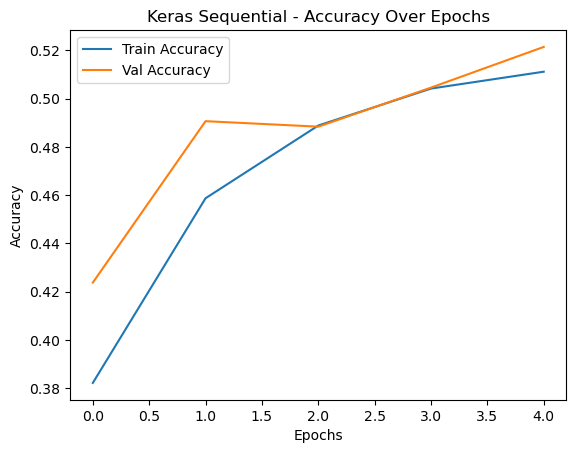

Found 8100 images belonging to 4 classes.


C:\Users\gm010\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


254/254 ━━━━━━━━━━━━━━━━━━━━ 80s 316ms/step - accuracy: 0.5102 - loss: 1.1178
Test Loss: 0.9737
Test Accuracy: 0.5594
254/254 ━━━━━━━━━━━━━━━━━━━━ 17s 66ms/step


NameError: name 'test_gen_2' is not defined

In [20]:
train_path_1 = "C://Users//gm010//NN//Alzheimer_MRI_4_classes_Split_Dataset//train"

test_path_1 = "C://Users//gm010//NN//Alzheimer_MRI_4_classes_Split_Dataset//test"

train_1, val_1 = load_data(train_path_1)

model_1_cnn = build_cnn_model(num_classes=4)

history_1 = train_and_evaluate(model_1_cnn, train_1, val_1, name="CNN",lr=.0001,epochs=5)

model_1 = build_sequential_model(num_classes=4)

history_1_2 = train_and_evaluate(model_1, train_1, val_1, name="Keras Sequential",lr=.0001,epochs=5)

test_gen_1 = load_test_data(test_path_1)

Show_confusion_matrix(model_1_cnn,test_gen_1)
Show_confusion_matrix(model_1,test_gen_1)


254/254 ━━━━━━━━━━━━━━━━━━━━ 17s 68ms/step - accuracy: 0.5102 - loss: 1.1178
Test Loss: 0.9737
Test Accuracy: 0.5594
254/254 ━━━━━━━━━━━━━━━━━━━━ 17s 68ms/step
Classification Report on Test Set:
                  precision    recall  f1-score   support

    MildDemented       0.70      0.39      0.50      3000
ModerateDemented       0.74      0.96      0.84      1500
     NonDemented       0.52      0.76      0.62      1920
VeryMildDemented       0.28      0.28      0.28      1680

        accuracy                           0.56      8100
       macro avg       0.56      0.60      0.56      8100
    weighted avg       0.58      0.56      0.54      8100



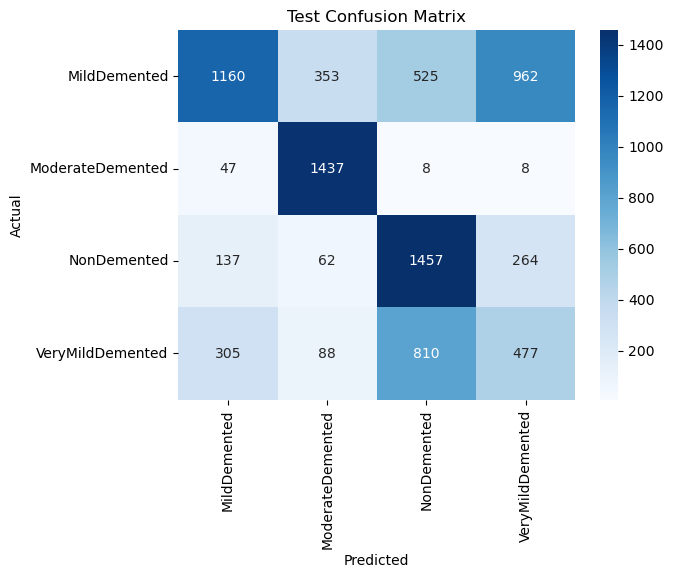

254/254 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - accuracy: 0.4962 - loss: 1.1452
Test Loss: 1.0461
Test Accuracy: 0.5209
254/254 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step
Classification Report on Test Set:
                  precision    recall  f1-score   support

    MildDemented       0.65      0.41      0.50      3000
ModerateDemented       0.58      0.88      0.70      1500
     NonDemented       0.47      0.69      0.56      1920
VeryMildDemented       0.31      0.21      0.25      1680

        accuracy                           0.52      8100
       macro avg       0.50      0.55      0.50      8100
    weighted avg       0.52      0.52      0.50      8100



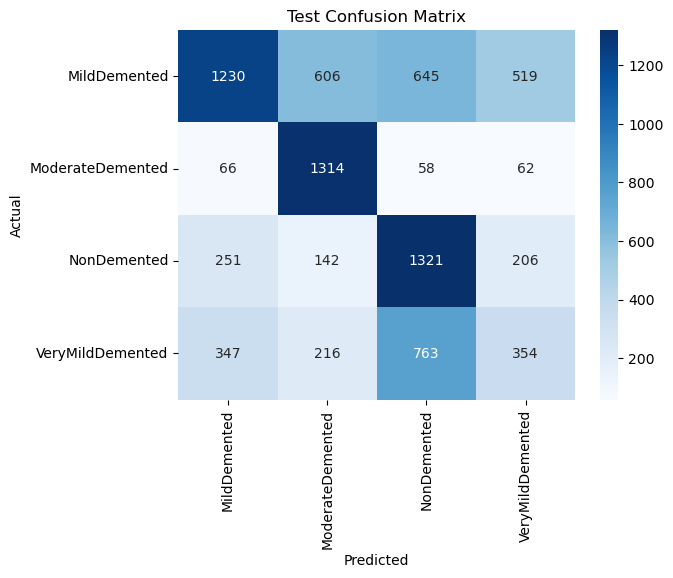

In [26]:
Show_confusion_matrix(model_1_cnn,test_gen_1)
Show_confusion_matrix(model_1,test_gen_1)

Found 26614 images belonging to 3 classes.
Found 6652 images belonging to 3 classes.
Epoch 1/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 398s 476ms/step - accuracy: 0.5559 - loss: 0.9586 - val_accuracy: 0.7148 - val_loss: 0.5637
Epoch 2/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 420s 505ms/step - accuracy: 0.6915 - loss: 0.6463 - val_accuracy: 0.7814 - val_loss: 0.4646
Epoch 3/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 424s 510ms/step - accuracy: 0.7170 - loss: 0.5742 - val_accuracy: 0.8059 - val_loss: 0.4122
Epoch 4/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 382s 459ms/step - accuracy: 0.7444 - loss: 0.5238 - val_accuracy: 0.8250 - val_loss: 0.3693
Epoch 5/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 372s 447ms/step - accuracy: 0.7683 - loss: 0.4931 - val_accuracy: 0.8346 - val_loss: 0.3567
Epoch 6/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 395s 474ms/step - accuracy: 0.7861 - loss: 0.4647 - val_accuracy: 0.8570 - val_loss: 0.3086
Epoch 7/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 365s 438ms/step - accuracy: 0.8022 - loss: 0.4299 - val_accuracy: 0.8652 - val_loss

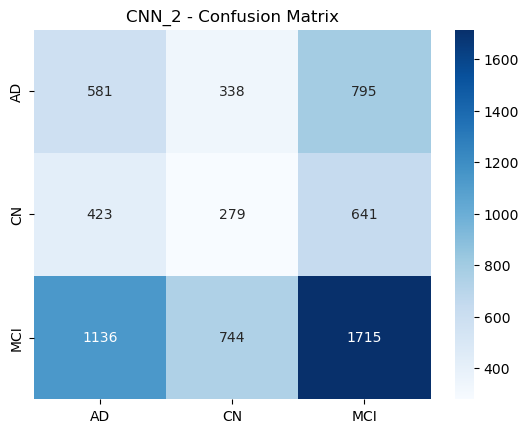

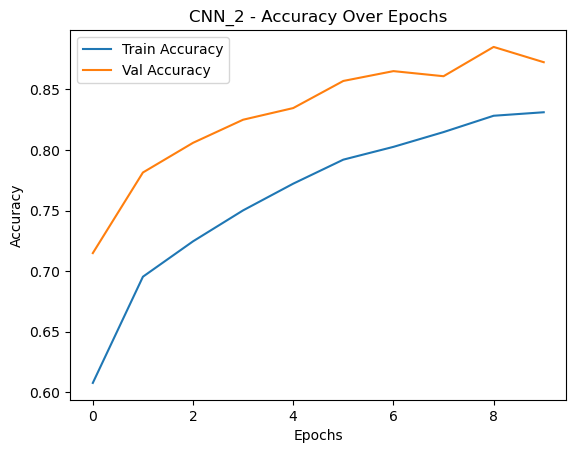

C:\Users\gm010\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 251s 301ms/step - accuracy: 0.4963 - loss: 2.9715 - val_accuracy: 0.5579 - val_loss: 0.9103
Epoch 2/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 242s 291ms/step - accuracy: 0.5370 - loss: 0.9433 - val_accuracy: 0.5689 - val_loss: 0.8916
Epoch 3/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 230s 276ms/step - accuracy: 0.5551 - loss: 0.9250 - val_accuracy: 0.5866 - val_loss: 0.8845
Epoch 4/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 222s 267ms/step - accuracy: 0.5533 - loss: 0.9211 - val_accuracy: 0.5830 - val_loss: 0.8831
Epoch 5/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 266s 319ms/step - accuracy: 0.5629 - loss: 0.9089 - val_accuracy: 0.5571 - val_loss: 0.9121
Epoch 6/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 230s 277ms/step - accuracy: 0.5588 - loss: 0.9136 - val_accuracy: 0.5684 - val_loss: 0.9124
Epoch 7/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 253s 304ms/step - accuracy: 0.5709 - loss: 0.9006 - val_accuracy: 0.6051 - val_loss: 0.8626
Epoch 8/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 248s 298ms/step - accuracy: 0.5655 -

C:\Users\gm010\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gm010\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gm010\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


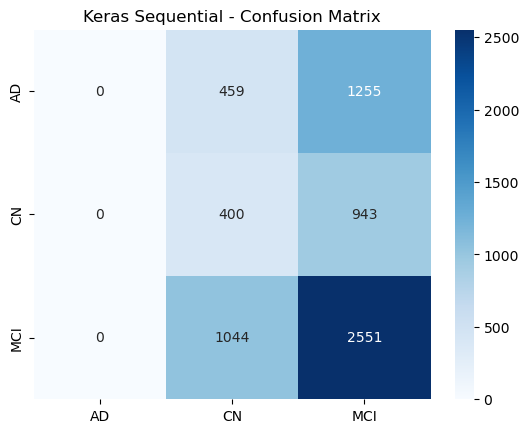

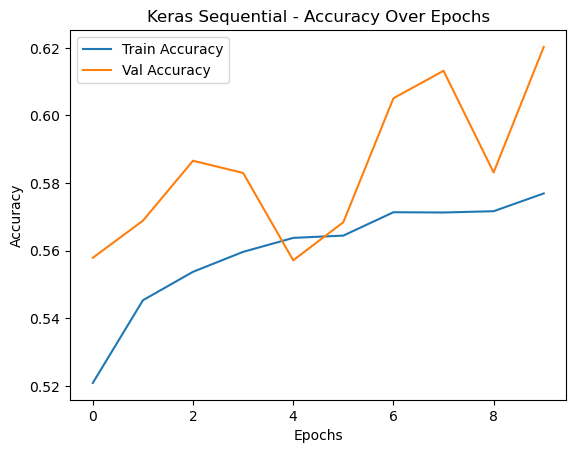

Found 5872 images belonging to 3 classes.


C:\Users\gm010\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


184/184 ━━━━━━━━━━━━━━━━━━━━ 58s 313ms/step - accuracy: 0.9110 - loss: 0.2590
Test Loss: 0.2822
Test Accuracy: 0.8750
184/184 ━━━━━━━━━━━━━━━━━━━━ 12s 66ms/step
Classification Report on Test Set:
              precision    recall  f1-score   support

          AD       0.71      0.92      0.80      1513
          CN       0.96      0.92      0.94      1186
         MCI       0.95      0.84      0.89      3173

    accuracy                           0.88      5872
   macro avg       0.88      0.89      0.88      5872
weighted avg       0.89      0.88      0.88      5872



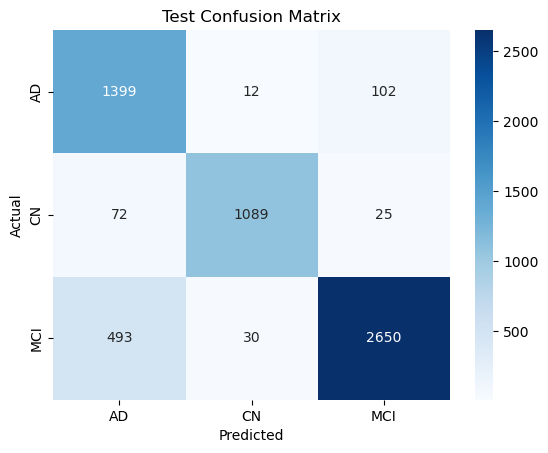

NameError: name 'model_nn_2' is not defined

In [30]:
train_path_2 = "C://Users//gm010//NN//Alzheimer_Split_3_classes_dataset//train"
test_path_2 = "C://Users//gm010//NN//Alzheimer_Split_3_classes_dataset//test"

train_2, val_2 = load_data(train_path_2)

model_2_cnn = build_cnn_model(num_classes=3, dropout=0.3)

history_2 = train_and_evaluate(model_2_cnn, train_2, val_2, name="CNN_2",epochs=10)

model_2 = build_sequential_model(num_classes=3)

history_2_2 = train_and_evaluate(model_2, train_2, val_2, name="Keras Sequential",epochs=10)

test_gen_2 = load_test_data(test_path_2)
Show_confusion_matrix(model_2_cnn,test_gen_2)
Show_confusion_matrix(model_nn_2,test_gen_2)

184/184 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - accuracy: 0.3125 - loss: 1.1253
Test Loss: 0.8512
Test Accuracy: 0.6107
184/184 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step
Classification Report on Test Set:
              precision    recall  f1-score   support

          AD       0.00      0.00      0.00      1513
          CN       0.51      0.70      0.59      1186
         MCI       0.65      0.87      0.74      3173

    accuracy                           0.61      5872
   macro avg       0.39      0.52      0.44      5872
weighted avg       0.45      0.61      0.52      5872



C:\Users\gm010\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gm010\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gm010\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


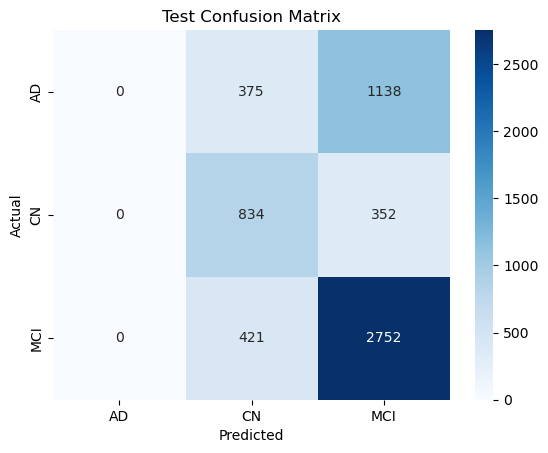

In [32]:
Show_confusion_matrix(model_2,test_gen_2)

In [20]:
train_path_3 = "C://Users//gm010//NN//Alzheimer_s Dataset//train"
test_path_3 = "C://Users//gm010//NN//Alzheimer_s Dataset//test"

train_3, val_3 = load_data(train_path_3)

test_gen_3 = load_test_data(test_path_3)

Found 4098 images belonging to 4 classes.
Found 1023 images belonging to 4 classes.
Found 1279 images belonging to 4 classes.


Epoch 1/15
129/129 ━━━━━━━━━━━━━━━━━━━━ 47s 358ms/step - accuracy: 0.4529 - loss: 1.3322 - val_accuracy: 0.5005 - val_loss: 1.0432
Epoch 2/15
129/129 ━━━━━━━━━━━━━━━━━━━━ 46s 354ms/step - accuracy: 0.5213 - loss: 0.9896 - val_accuracy: 0.4643 - val_loss: 1.0761
Epoch 3/15
129/129 ━━━━━━━━━━━━━━━━━━━━ 48s 372ms/step - accuracy: 0.5579 - loss: 0.9561 - val_accuracy: 0.3412 - val_loss: 1.1168
Epoch 4/15
129/129 ━━━━━━━━━━━━━━━━━━━━ 48s 374ms/step - accuracy: 0.5602 - loss: 0.9093 - val_accuracy: 0.4379 - val_loss: 1.0667
Epoch 5/15
129/129 ━━━━━━━━━━━━━━━━━━━━ 50s 385ms/step - accuracy: 0.5709 - loss: 0.8896 - val_accuracy: 0.4633 - val_loss: 1.0162
Epoch 6/15
129/129 ━━━━━━━━━━━━━━━━━━━━ 52s 403ms/step - accuracy: 0.6220 - loss: 0.8446 - val_accuracy: 0.4555 - val_loss: 1.0416
Epoch 7/15
129/129 ━━━━━━━━━━━━━━━━━━━━ 50s 384ms/step - accuracy: 0.6224 - loss: 0.8405 - val_accuracy: 0.4839 - val_loss: 1.0222
Epoch 8/15
129/129 ━━━━━━━━━━━━━━━━━━━━ 48s 373ms/step - accuracy: 0.6166 - loss: 0

C:\Users\gm010\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gm010\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gm010\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


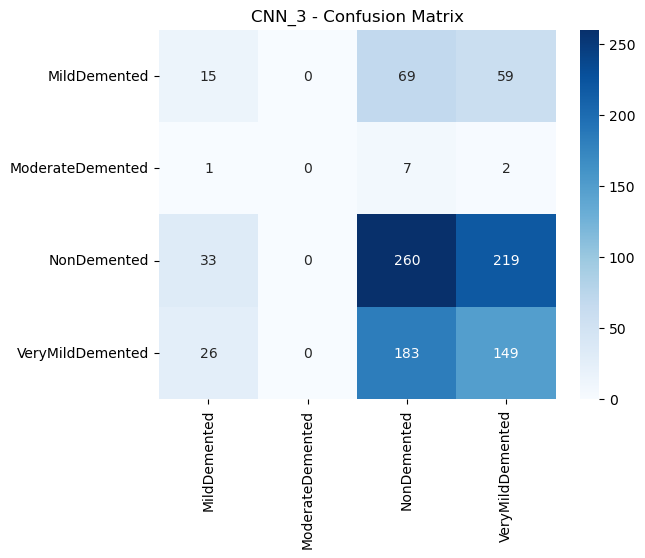

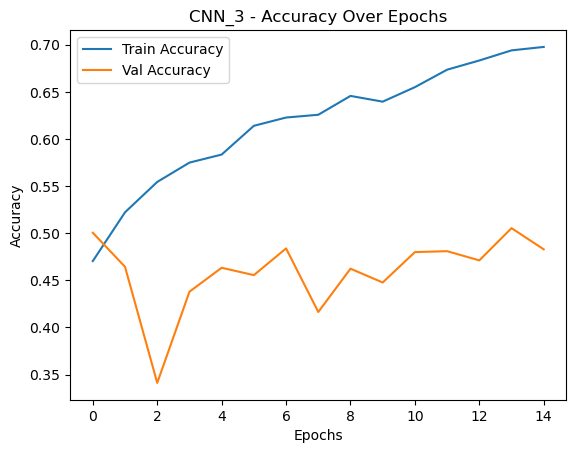

In [33]:
model_3_cnn = build_cnn_model(num_classes=4)

history_3 = train_and_evaluate(model_3_cnn, train_3, val_3, name="CNN_3")

C:\Users\gm010\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(
C:\Users\gm010\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
129/129 ━━━━━━━━━━━━━━━━━━━━ 49s 370ms/step - accuracy: 0.4019 - loss: 11.9680 - val_accuracy: 0.4428 - val_loss: 2.1538
Epoch 2/15
129/129 ━━━━━━━━━━━━━━━━━━━━ 38s 296ms/step - accuracy: 0.4881 - loss: 3.2053 - val_accuracy: 0.4516 - val_loss: 2.5514
Epoch 3/15
129/129 ━━━━━━━━━━━━━━━━━━━━ 42s 329ms/step - accuracy: 0.5187 - loss: 2.1306 - val_accuracy: 0.4809 - val_loss: 2.3953
Epoch 4/15
129/129 ━━━━━━━━━━━━━━━━━━━━ 38s 291ms/step - accuracy: 0.5282 - loss: 2.0523 - val_accuracy: 0.3705 - val_loss: 4.5117
Epoch 5/15
129/129 ━━━━━━━━━━━━━━━━━━━━ 38s 298ms/step - accuracy: 0.5529 - loss: 1.6258 - val_accuracy: 0.3255 - val_loss: 2.9812
Epoch 6/15
129/129 ━━━━━━━━━━━━━━━━━━━━ 40s 308ms/step - accuracy: 0.5179 - loss: 1.8344 - val_accuracy: 0.4692 - val_loss: 2.7949
Epoch 7/15
129/129 ━━━━━━━━━━━━━━━━━━━━ 41s 320ms/step - accuracy: 0.5119 - loss: 2.3420 - val_accuracy: 0.4194 - val_loss: 1.8425
Epoch 8/15
129/129 ━━━━━━━━━━━━━━━━━━━━ 53s 413ms/step - accuracy: 0.5226 - loss: 

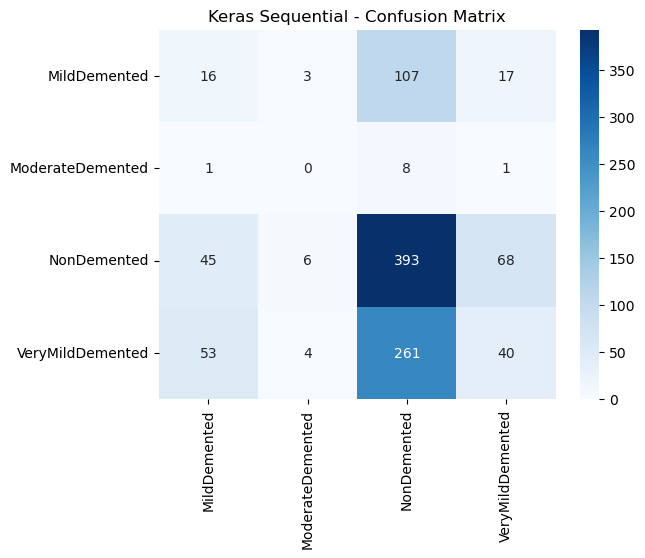

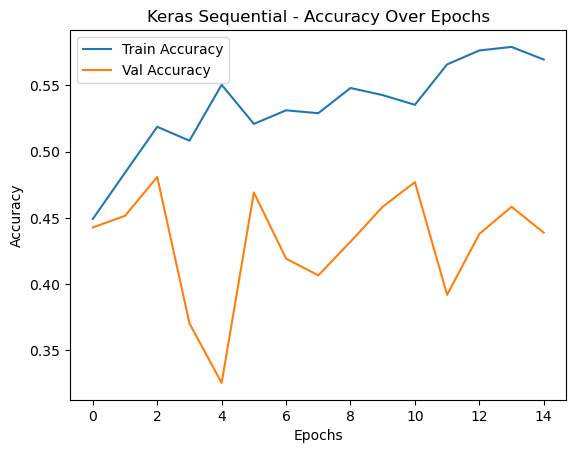

In [28]:
model_3 = build_sequential_model(num_classes=4)

history_3 = train_and_evaluate(model_3, train_3, val_3, name="Keras Sequential")

C:\Users\gm010\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.5155 - loss: 1.5772
Test Loss: 1.3293
Test Accuracy: 0.5129
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step
Classification Report on Test Set:
                  precision    recall  f1-score   support

    MildDemented       1.00      0.02      0.04       179
ModerateDemented       0.00      0.00      0.00        12
     NonDemented       0.51      1.00      0.68       640
VeryMildDemented       0.60      0.03      0.05       448

        accuracy                           0.51      1279
       macro avg       0.53      0.26      0.19      1279
    weighted avg       0.61      0.51      0.36      1279



C:\Users\gm010\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gm010\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gm010\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


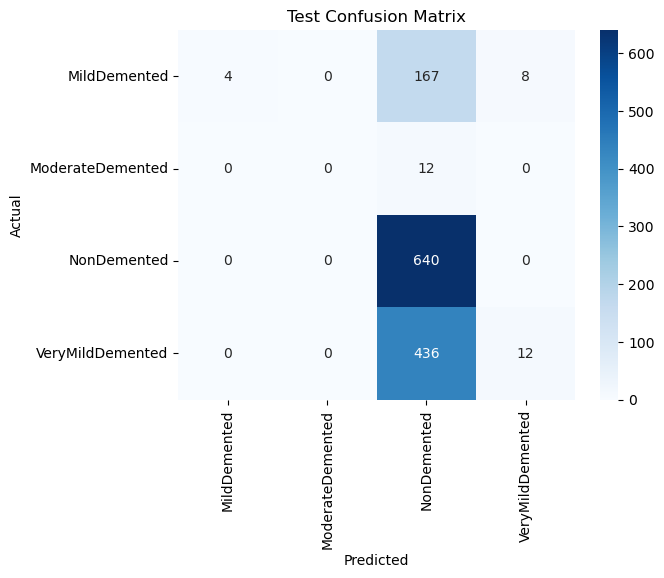

40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.3808 - loss: 1.3062
Test Loss: 0.9817
Test Accuracy: 0.5152
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step
Classification Report on Test Set:
                  precision    recall  f1-score   support

    MildDemented       0.54      0.20      0.29       179
ModerateDemented       0.00      0.00      0.00        12
     NonDemented       0.72      0.38      0.50       640
VeryMildDemented       0.43      0.84      0.57       448

        accuracy                           0.52      1279
       macro avg       0.42      0.36      0.34      1279
    weighted avg       0.59      0.52      0.49      1279



C:\Users\gm010\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gm010\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gm010\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


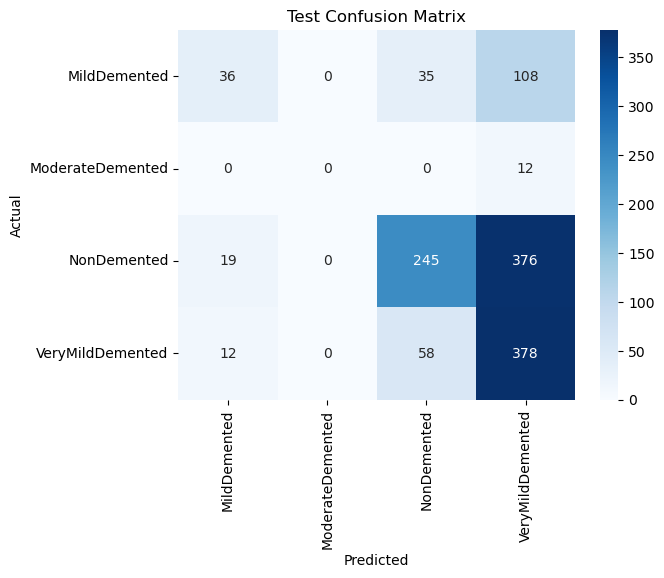

In [35]:
Show_confusion_matrix(model_3,test_gen_3)
Show_confusion_matrix(model_3_cnn,test_gen_3)